In [235]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# https://www.kaggle.com/mustafaali96/weight-height/downloads/weight-height.zip/1

In [16]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [17]:
data['Height'] *= 2.54
data['Weight'] /= 2.205

In [18]:
data.head()

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114
3,Male,182.196685,99.792504
4,Male,177.499761,93.582676


In [19]:
data['Gender'].value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

In [37]:
data_male = data[data['Gender'] == 'Male'].copy()
data_female = data[data['Gender'] == 'Female'].copy()

In [21]:
data_male.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,175.326919,84.816608
std,7.272940,8.971045
min,148.353539,51.203147
25%,170.623685,78.860665
50%,175.330380,84.822470
75%,180.311409,90.865216
max,200.656806,122.444308


In [22]:
data_female.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,161.820285,61.614555
std,6.848561,8.626970
min,137.828359,29.342461
25%,157.211881,55.752425
50%,161.876547,61.731330
75%,166.531456,67.487948
max,186.409548,91.717557


In [105]:
data_male['Height'].describe()

count    5000.000000
mean      175.326919
std         7.272940
min       148.353539
25%       170.623685
50%       175.330380
75%       180.311409
max       200.656806
Name: Height, dtype: float64

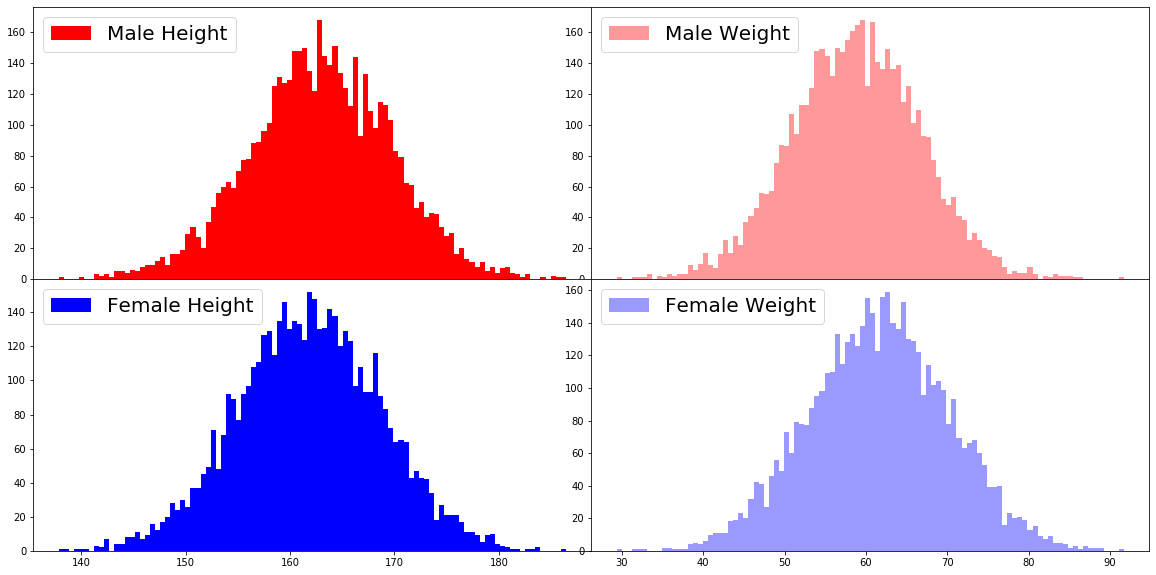

In [173]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
plt.subplots_adjust(wspace=0, hspace=0)

axes[0,0].hist(data_male['Height'], label='Male Height', bins=100, color='red')
axes[0,1].hist(data_male['Weight'], label='Male Weight', bins=100, color='red', alpha=0.4)
axes[1,0].hist(data_female['Height'], label='Female Height', bins=100, color='blue')
axes[1,1].hist(data_female['Weight'], label='Female Weight', bins=100, color='blue', alpha=0.4)

axes[0,0].legend(loc=2, fontsize=20)
axes[0,1].legend(loc=2, fontsize=20)
axes[1,0].legend(loc=2, fontsize=20)
axes[1,1].legend(loc=2, fontsize=20)


plt.show()

In [99]:
mean = data_male['Height'].mean()
print('mean:\t{:.2f}'.format(mean))

mean:	175.33


In [38]:
data_male['Height_d'] = (data_male['Height'] - mean) ** 2
data_male['Height_d'].head()

0    149.927893
1      0.385495
2    166.739089
3     47.193692
4      4.721246
Name: Height_d, dtype: float64

In [100]:
disp = data_male['Height_d'].mean()
print('disp:\t{:.2f}'.format(disp))

disp:	52.89


In [101]:
std = disp ** 0.5
print('std:\t{:.2f}'.format(std))

std:	7.27


In [114]:
def get_stats(series, title='noname'):
    # print title
    print('= {} =\n'.format(title.upper()))
    
    # getting describe
    descr = series.describe()
    
    # mean getting and print
    mean = descr['mean']
    print('= Mean:\t{:.0f}'.format(mean))

    # std getting and print
    std = descr['std']
    print('= Std:\t{:.0f}'.format(std))
    
    # splitter
    print('\n= = = =\n')
    
    # percent deviations
    ## 68%
    devi_1 = [mean - std, mean + std]
    ## 95%
    devi_2 = [mean - 2 * std, mean + 2 * std]
    ## 99.7%
    devi_3 = [mean - 3 * std, mean + 3 * std]
    
    #print deviations
    print('= 68% is from\t\t{:.0f} to {:.0f}'.format(devi_1[0], devi_1[1]))
    print('= 95% is from\t\t{:.0f} to {:.0f}'.format(devi_2[0], devi_2[1]))
    print('= 99.7% is from\t\t{:.0f} to {:.0f}'.format(devi_3[0], devi_3[1]))

In [115]:
get_stats(data_male['Height'], title='Male Height')

= MALE HEIGHT =

= Mean:	175
= Std:	7

= = = =

= 68% is from		168 to 183
= 95% is from		161 to 190
= 99.7% is from		154 to 197


In [116]:
get_stats(data_male['Weight'], title='Male Weight')

= MALE WEIGHT =

= Mean:	85
= Std:	9

= = = =

= 68% is from		76 to 94
= 95% is from		67 to 103
= 99.7% is from		58 to 112


In [117]:
get_stats(data_female['Height'], title='Female Height')

= FEMALE HEIGHT =

= Mean:	162
= Std:	7

= = = =

= 68% is from		155 to 169
= 95% is from		148 to 176
= 99.7% is from		141 to 182


In [118]:
get_stats(data_female['Weight'], title='Female Weight')

= FEMALE WEIGHT =

= Mean:	62
= Std:	9

= = = =

= 68% is from		53 to 70
= 95% is from		44 to 79
= 99.7% is from		36 to 87


In [191]:
X_train, X_test, y_train, y_test = train_test_split(data_male['Height'], data_male['Weight'])

In [230]:
knr3 = KNeighborsRegressor(n_neighbors=3)
knr3.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
knr3.score(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

0.826981790199253

In [207]:
knr5 = KNeighborsRegressor(n_neighbors=5)
knr5.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
knr5.score(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

0.791243426107014

In [208]:
knr7 = KNeighborsRegressor(n_neighbors=7)
knr7.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
knr7.score(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

0.7768360917448904

In [231]:
knr3.predict([[164]])

array([[76.9541182]])

In [225]:
array = []
xaxis = range(154, 198)

for h in xaxis:
    ans = knr3.predict([[h]])
    array.append(ans[0][0])

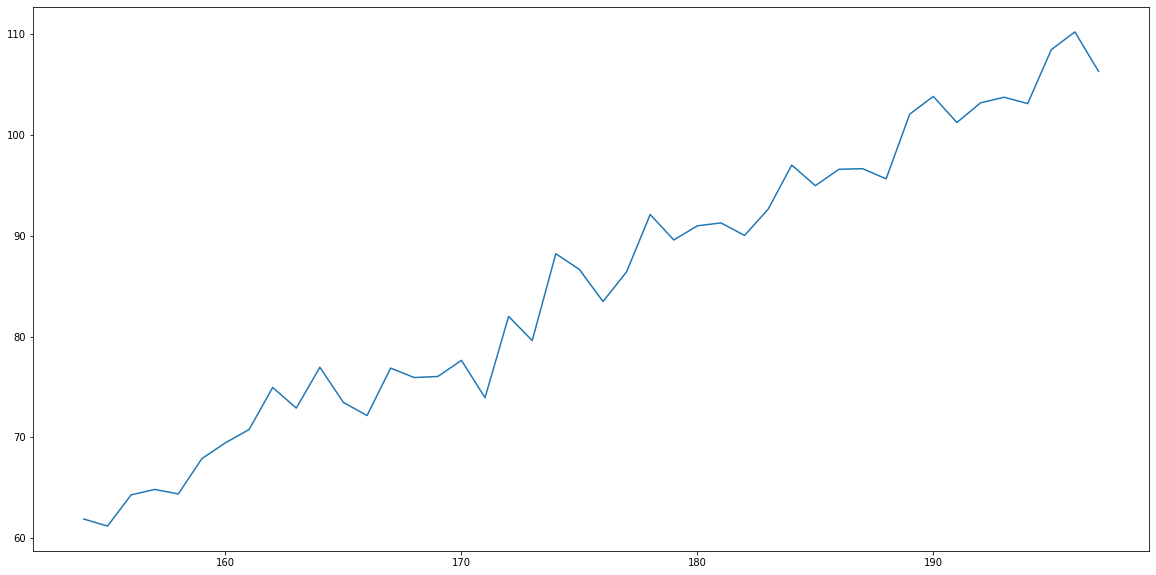

In [226]:
plt.figure(figsize=(20,10))
plt.plot(xaxis, array)
plt.show()

In [233]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
lr.score(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

0.7418087515721397

In [234]:
lr.predict([[164]])

array([[72.7833104]])

In [249]:
mlp = MLPRegressor(hidden_layer_sizes=(90, 10))
mlp.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
mlp.score(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

/home/andy/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5218700312281489

In [250]:
mlp.predict([[164]])

array([79.54181609])